Find the frequency of words in Mr. Kenneth Lay’s emails in the deleted_item folder

In [1]:
#importing required packages
import os
from email.parser import Parser
import nltk
from nltk.corpus import stopwords

In [2]:
#initializations
email_body=[]
path="C:/Users/prith/Documents/PrithviPython/kamath_prithvi_spring2017/midterm/data/enron/enron_mail_20150507/maildir/lay-k/deleted_items"

#traversing through various directories, subdirectories and files
for directory, subdirectory, filenames in  os.walk(path):
    for filename in filenames:
        with open(os.path.join(directory, filename), "r") as f:
            data = f.read()
        email = Parser().parsestr(data)
        email_body.append(email.get_payload())

In [3]:
#extract words using split
parts=[]
for element in email_body:
    for email in element.rstrip().split(' '):
        parts.append(email)

In [4]:
#create a dictionary containing words and its frequency
wordcount={}
for word in parts:
    if word.isalpha():
        if word not in stopwords.words():
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1
sorted_words=sorted(wordcount.items(), key=lambda x: x[1], reverse=True)
print("Top 15 words and their frequencies are: ")
sorted_words[:15]

Top 15 words and their frequencies are: 


[('Enron', 5552),
 ('energy', 3322),
 ('consumers', 3206),
 ('made', 3142),
 ('employees', 2242),
 ('donate', 2236),
 ('stock', 2233),
 ('retirement', 2219),
 ('bankruptcy', 2205),
 ('California', 2186),
 ('millions', 2148),
 ('pay', 2132),
 ('declared', 2099),
 ('company', 2042),
 ('funds', 1127)]

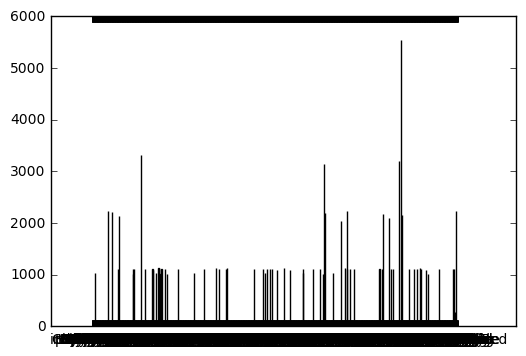

In [5]:
#generate a bar graph using the above generated frequency dictionary
import matplotlib.pyplot as plt

plt.bar(range(len(wordcount)), wordcount.values(), align='center')
plt.xticks(range(len(wordcount)), wordcount.keys())
plt.gca().invert_xaxis()

plt.show()